In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv('titanic_train.csv', usecols = ['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [2]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [3]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

# Random Sample Imputation
It consists of taking random observations from the dataset and we use this observation to replace the NAN values

# When is Used??
It assumes that data are missing completely at random

In [4]:
df['Age'].isnull().sum()

177

In [5]:
df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state = 0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

# Why dropna() is used?

This is because, we need to pickup the random values  that are not NAN...So after dropping the NAN values, we select the random samples from the remaining data..

In [6]:
# Now find out the index of all the NAN values

df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [17]:
# now we define the function to impute NAN values..Here we are displaying the meadian iputation also
# for the comparison of these two methods

def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    
##It will have the random sample to fill the na
    
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    
##pandas need to have same index in order to merge the dataset
    
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [21]:
median=df.Age.median()
median
impute_nan(df,"Age",median)

In [22]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


# STEP3. Now find the Standard Deviation of Age, Age_random and Age_median to find if there is a huge difference between these two.

In [11]:
print(df['Age'].std())
print(df['Age_median'].std())
print(df['Age_random'].std())

14.526497332334044
13.019696550973194
14.5636540895687


### Wow it works wellwith random iputation

# Now visualize it

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

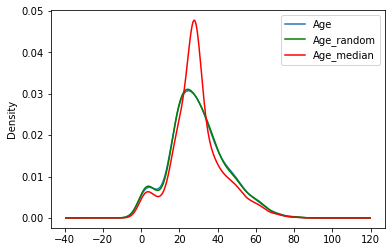

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_random.plot(kind='kde', ax=ax, color='green')
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# PERFECT!!!!!!!!!!

## Advantages
1. East to implement
2. There is less distortion in variance

## Disadvantages

1. Every sitaution randomness dont work

# Capturing NAN values with a new feature

In [2]:
import pandas as pd
import numpy as np

df=pd.read_csv('titanic_train.csv', usecols = ['Age', 'Fare', 'Survived'])
df.head()

df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [3]:
df['Age_NAN'] = np.where(df['Age'].isnull(), 1,0)
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [6]:
print(df['Age'].std())
print(df['Age_NAN'].std())

14.526497332334044
0.3992104339880471


In [3]:
median=df['Age'].median()
median

28.0

In [4]:
df['Age'].fillna(median, inplace = True)
df.head(8)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,28.0,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750


# Advantages:
1. Easy to implement
2. Captures the importance of missingness

# Disadvantages:
1. Creating Additional Features(Curse of Dimensionality)

# 4. End of Distribution Imputation
Here we take the end of the didtribution values to replace thr null values. To get the tail distribution value, tal=ke the value after 3rd normal distribution..

<AxesSubplot:>

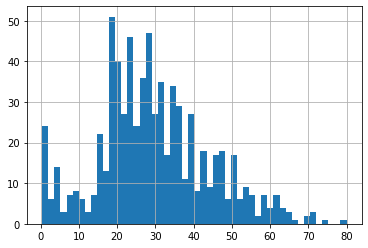

In [5]:
# just visuaalising
df.Age.hist(bins=50)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

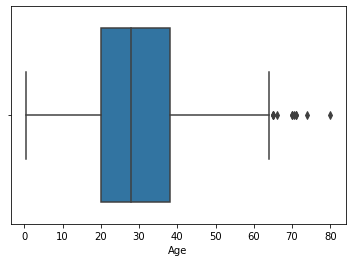

In [6]:
import seaborn as sns
sns.boxplot('Age',data=df)

#### Here outliers are present... in the next steps we are going to use End of Distribution Imputation.

In [7]:
# Mean actually gives the central values
df.Age.mean()

29.69911764705882

In [3]:
# to get the 3rd distribution values
extreme = df.Age.mean() + 3 * df.Age.std()

In [8]:
# Function to impute nan values

def impute_nan(df, variable, median, extreme):
    df[variable+'_end_distribution'] = df[variable].fillna(extreme)
    df[variable].fillna(median, inplace = True)
    


In [10]:
impute_nan(df, 'Age', df.Age.median(), extreme )
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

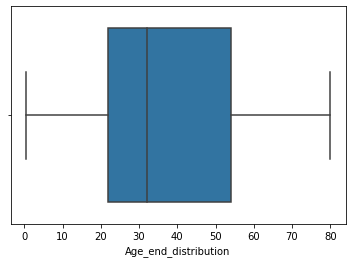

In [11]:
import seaborn as sns
sns.boxplot('Age_end_distribution',data=df)

# perfect!!..NO OUTLIERS

# Advantages
1 Easy to implement

2. Captures the importance of missingness

# DisadvantagES
1. Distorts the original distribution of variable
2. If missingness is not important, it msy mask the predictive power of the original variable by distorting its distribution
3. If the number of NA is big, it will mask the outliers in the distribution
4. If the number of NA is small, the replaced NA will be considered an outlier and preprocessed in a subsequent feature engineering

# Arbitary Value Imputation
It consists of replacing NAN values by an arbitary value.

The arbitary value is basically an outlier value..

we select the last outlier or the least outlier to fill the NAN value..

<AxesSubplot:>

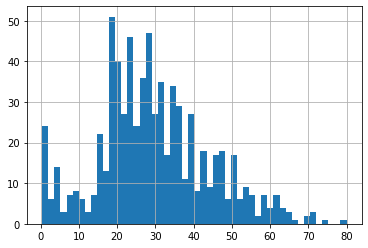

In [2]:
df.Age.hist(bins=50)

In [4]:
def immpute_nan(df, variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)

# Advantages
Easy to implement

Captures the importance of missingess if there is one


# Disadvantages¶
Distorts the original distribution of the variable
    
If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
    
Hard to decide which value to use
